# **Densenet_Pytorch**
* https://www.kaggle.com/code/niharika41298/pytorch-waste-classification-using-densenet

### **1. Import Labraries**

In [ ]:
import torch
import numpy as np
import os
%matplotlib inline
%config InlineBackend.figure_forget = 'retina'

import matplotlib.pyplot as plt

from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader

**Check if CUDA is available**

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
  print('CUDA is not available. Trining on CPU.')
else:
  print('CUDA is avaiable. Training on GPU')

CUDA is avaiable. Training on GPU


### **2. Preprocessing data**

**Define data's transformation method**

In [ ]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 32
# percentage of training set to use as validation
valid_size = 0.2
# convert data to a normalized torch.FloatTensor
train_transform = transforms.Compose([transforms.RandomRotation(30),
                                      transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                                           std = [0.229, 0.224, 0.225])])

test_transform = transforms.Compose([transforms.Resize(255),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                                          std = [0.229, 0.224, 0.225])])

**Download data**

In [ ]:
{"username":"trnxunkhanh","key":"eb828593f1426c62d329772657dfa85b"}
os.environ['KAGGLE_USERNAME'] = 'trnxunkhanh'
os.environ['KAGGLE_KEY'] = 'eb828593f1426c62d329772657dfa85b'

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download techsash/waste-classification-data --unzip

 98% 419M/427M [00:05<00:00, 35.1MB/s]
100% 427M/427M [00:05<00:00, 83.2MB/s]


In [ ]:
# Create image folder
data_dir = 'DATASET'
train_data_dir = os.path.join('DATASET', 'TRAIN')
test_data_dir = os.path.join('DATASET', 'TEST')
train_data = datasets.ImageFolder(train_data_dir, transform = train_transform)
test_data = datasets.ImageFolder(test_data_dir, transform = test_transform)

In [ ]:
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
# np.floor(): trả về số nguyên lớn nhất không lớn hơn tham số đầu vào
train_idx, valid_idx = indices[split:], indices[:split]

# Define samples for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# Prepare data loaders (combine dataset and sampler)
train_loader = DataLoader(train_data, batch_size = batch_size,
                          sampler = train_sampler, num_workers = num_workers)
valid_loader = DataLoader(train_data, batch_size = batch_size,
                          sampler = valid_sampler, num_workers = num_workers)
test_loader = DataLoader(test_data, batch_size = batch_size,
                         num_workers = num_workers)

In [ ]:
print(len(train_loader))
print(len(valid_loader))
print(len(test_loader))

565
141
79


In [ ]:
#defining classes
classes=['O','R']

**Visualize Image**

In [ ]:
# helper function to un-normalize and display an image
def imshow(img):
  img = img / 2 + 0.5 # unnormalize
  plt.imshow(np.transpose(img, (1, 2, 0)))

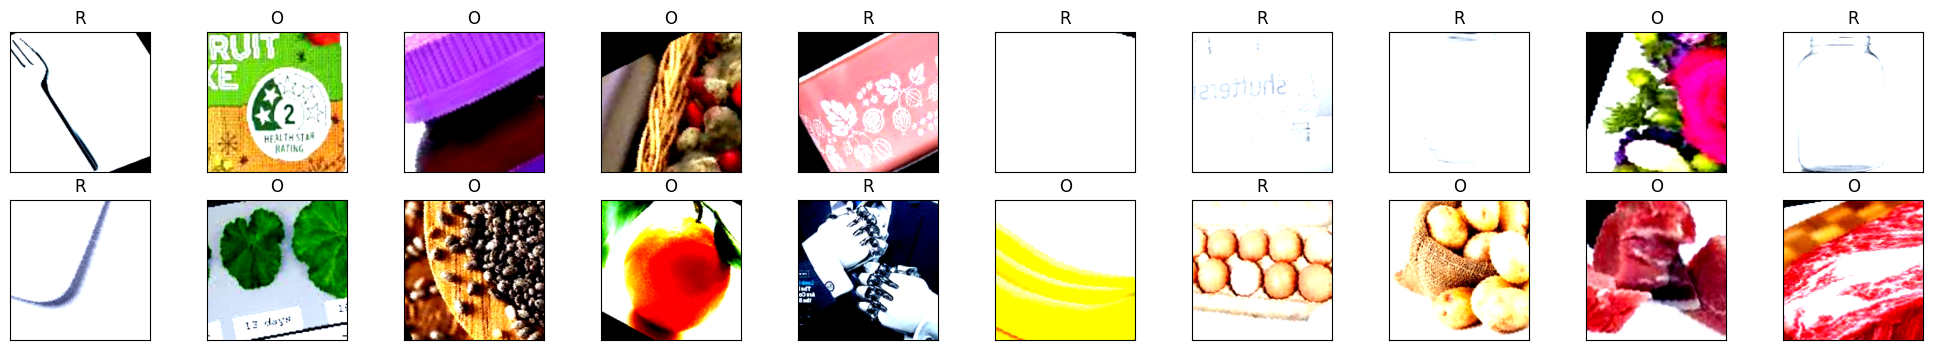

In [ ]:
from torch.utils import data
# Obitan one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize = (25, 4))
# display 20 images
for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  imshow(images[idx])
  ax.set_title(classes[labels[idx]])

torch.Size([32, 3, 224, 224])
tensor(1)


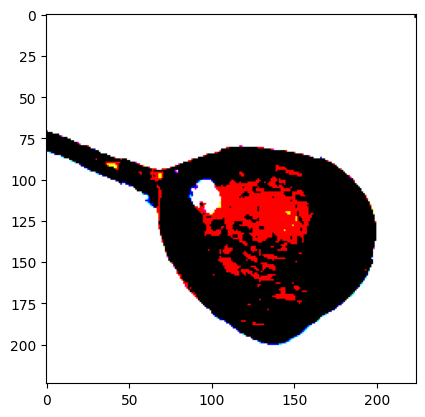

In [ ]:
batch = next(iter(train_loader))
print(batch[0].shape)
out = batch[0][0].permute(1, 2, 0)
plt.imshow(out * 255)
print(batch[1][0])

### **3. Define Module**

In [ ]:
model = models.densenet121(pretrained = True)
model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 94.7MB/s]


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
# Freeze parameters so we don't backprop through them
for param in model.parameters():
  param.requires_grad = False

model.classifier = nn.Sequential(nn.Linear(1024, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(256, 2),
                                 nn.LogSoftmax(dim = 1))

criterion = nn.NLLLoss()

# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.classifier.parameters(), lr = 3e-2)

model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

### **4. Train Model**

In [ ]:
# number of epochs to train the model
n_epochs = 20

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs + 1):
  # Keep track of training and validation loss
  train_loss = 0.0
  valid_loss = 0.0

  #####################
  '''Train the model'''
  #####################

  model.train()
  for data, target in train_loader:
    # Move tensor to GPU if CUDA is available
    if train_on_gpu:
      data, target = data.cuda(), target.cuda()

    # Clear the gradients of all optimized variables
    optimizer.zero_grad()

    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)

    # Caculate the batch loss
    loss = criterion(output, target)

    # backward pass: compute gradient of loss with respect to model parameters
    loss.backward()

    # perform a single optimization step (parameter update)
    optimizer.step()

    # updata training loss
    train_loss += loss.item() * data.size(0)

  #####################
  ''' Validate the model'''
  #####################

  model.eval()
  for data, target in valid_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
      data, target = data.cuda(), target.cuda()

    # forward pass: computer the pridicted outputs by passing inputs to the model
    output = model(data)

    # caculate the batch loss
    loss = criterion(output, target)

    # updata average validation loss
    valid_loss += loss.item() * data.size(0)

  # caculate average losses
  train_loss = train_loss/len(train_loader.sampler)
  valid_loss = valid_loss/len(valid_loader.sampler)

  # print training/validation statistics
  print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
      epoch, train_loss, valid_loss))

  # save model if validation loss has decreased
  if valid_loss <= valid_loss_min:
    print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min, valid_loss))
    torch.save(model.state_dict(), 'model_waste.pt')
    vaid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.433783 	Validation Loss: 0.290002
Validation loss decreased (inf --> 0.290002).  Saving model ...
Epoch: 2 	Training Loss: 0.431307 	Validation Loss: 0.340750
Validation loss decreased (inf --> 0.340750).  Saving model ...
Epoch: 3 	Training Loss: 0.393657 	Validation Loss: 0.324585
Validation loss decreased (inf --> 0.324585).  Saving model ...
Epoch: 4 	Training Loss: 0.403957 	Validation Loss: 0.419872
Validation loss decreased (inf --> 0.419872).  Saving model ...
Epoch: 5 	Training Loss: 0.388831 	Validation Loss: 0.316566
Validation loss decreased (inf --> 0.316566).  Saving model ...
Epoch: 6 	Training Loss: 0.403535 	Validation Loss: 0.266503
Validation loss decreased (inf --> 0.266503).  Saving model ...
Epoch: 7 	Training Loss: 0.518010 	Validation Loss: 0.690500
Validation loss decreased (inf --> 0.690500).  Saving model ...
Epoch: 8 	Training Loss: 0.687266 	Validation Loss: 0.689161
Validation loss decreased (inf --> 0.689161).  Saving model ...


In [ ]:
model.load_state_dict(torch.load('model_waste.pt'))

<All keys matched successfully>

### **5. Track test loss**

In [ ]:
# Track test loss
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()
# iterate over test data
for data, target in test_loader:
  # move tensors to GPU if CUDA is available
  if train_on_gpu:
    data, target = data.cuda(), target.cuda()

  # forward pass: compute predicted outputs by passing inputs to the model
  output = model(data)

  # caculate the batch loss
  loss = criterion(output, target)

  # updata test loss
  test_loss += loss.item() * data.size(0)

  # convert output probabilities to predicted class
  _, pred = torch.max(output, 1)

  # compare predictions to true label
  correct_tensor = pred.eq(target.data.view_as(pred))
  correct = np.squezee(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())

  # caculate tetst accuracy for each object class
  for i in range(2):
    label = target.data[i]
    class_correct[label] += correct[i].item()
    class_total[label] += 1

  # average test loss
  test_loss = test_loss/len(test_loader.dataset)
  print('Test Loss: {:.6f}\n'.format(test_loss))

  for i in range(2):
    if class_total[i] > 0:
      print('Test Accuracy of %5s: %2d%% (%2d%2d)' % (classes[i], 100 * class_correct[i]/class_total[i],
                                                      np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
      print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

  print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (100. * np.sum(class_correct) / np.sum(class_total),
                                                                      np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.004027

Test Accuracy of     O: 100% ( 2 2)
Test Accuracy of     R: N/A (no training examples)

Test Accuracy (Overall): 100% ( 2/ 2)
Test Loss: 0.005057

Test Accuracy of     O: 75% ( 3 4)
Test Accuracy of     R: N/A (no training examples)

Test Accuracy (Overall): 75% ( 3/ 4)
Test Loss: 0.002710

Test Accuracy of     O: 83% ( 5 6)
Test Accuracy of     R: N/A (no training examples)

Test Accuracy (Overall): 83% ( 5/ 6)
Test Loss: 0.001536

Test Accuracy of     O: 87% ( 7 8)
Test Accuracy of     R: N/A (no training examples)

Test Accuracy (Overall): 87% ( 7/ 8)
Test Loss: 0.002321

Test Accuracy of     O: 90% ( 910)
Test Accuracy of     R: N/A (no training examples)

Test Accuracy (Overall): 90% ( 9/10)
Test Loss: 0.003973

Test Accuracy of     O: 91% (1112)
Test Accuracy of     R: N/A (no training examples)

Test Accuracy (Overall): 91% (11/12)
Test Loss: 0.004107

Test Accuracy of     O: 78% (1114)
Test Accuracy of     R: N/A (no training examples)

Test Accuracy (Overa

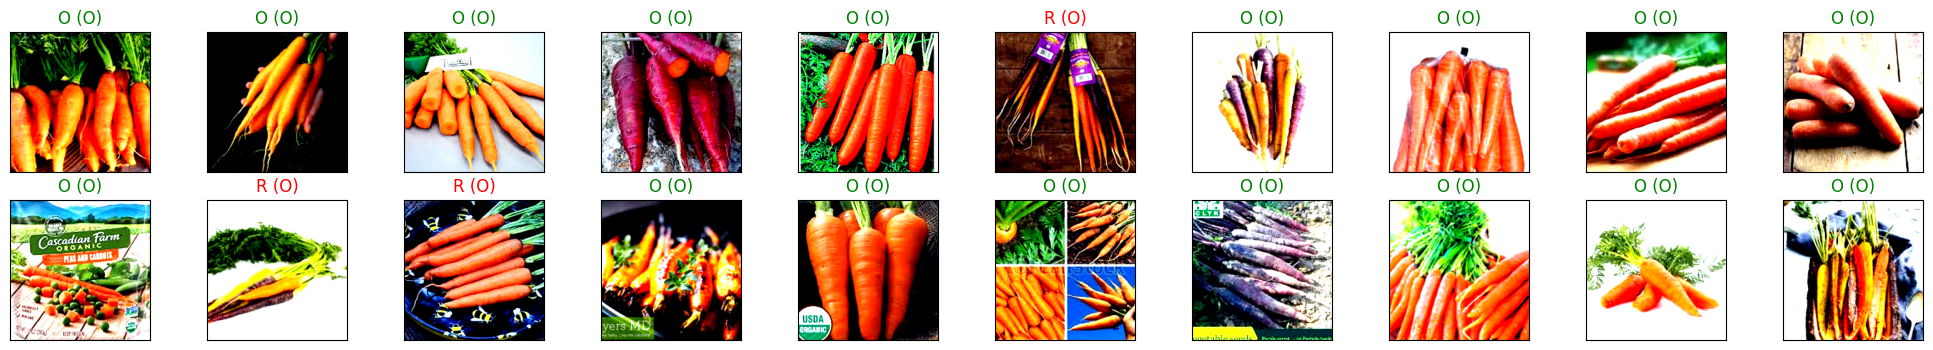

In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)
images.numpy()

# move model inputs to cuda, if GPU available
if train_on_gpu:
  images = images.cuda()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
  ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
  imshow(images.cpu()[idx])
  ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
               color=("green" if preds[idx]==labels[idx].item() else "red"))

In [ ]:
# https://www.kaggle.com/code/niharika41298/pytorch-waste-classification-using-densenet